<a href="https://colab.research.google.com/github/HappySunnyDay/2022test/blob/main/5%EC%A3%BC%EC%B0%A8_%EC%B5%9C%EC%A2%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#< 서울시의 초등학교 현황 데이터 분석(2010년~2021년) >
##- 궁금한 자치구 입력 → 데이터 출력

##① 서울시의 11년(2010년~2021년)간 특정 자치구의 초등학교 현황 변화 알아보기
##② 서울시 특정 자치구의 초등학교 현황 변화 그래프로 알아보기 (학교 수, 학급 수, 학생 수, 교원 수)
##③ 서울시 특정 자치구의 초등학교 현황 변화 그래프로 알아보기2 (학급 당 학생 수, 교사 1명 당 학생 수)

* 데이터 출처 : 서울 열린데이터 광장 https://data.seoul.go.kr/, '서울시 초등학교 통계' 자료에서 발췌

* 업로드 파일 링크 : https://drive.google.com/file/d/16VVDVdxJUNpOiYYOWfgpJxbJ2Piria1P/view?usp=sharing

#### 1) 데이터 업로드하기  
```
from google.colab import files
files.upload()
```



In [ ]:
from google.colab import files
files.upload()

Saving seoul10-21.csv to seoul10-21.csv


{'seoul10-21.csv': b'\xef\xbb\xbf\xec\x9e\x90\xec\xb9\x98\xea\xb5\xac\xeb\xb3\x84(1),\xec\x9e\x90\xec\xb9\x98\xea\xb5\xac\xeb\xb3\x84(2),2010,2010,2010,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,2011,2011,2011,2011,2011,2012,2012,2012,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020,2020,2021,2021,2021,2021,2021,2021,2021,2021,2021\r\n\xec\x9e\x90\xec\xb9\x98\xea\xb5\xac\xeb\xb3\x84(1),\xec\x9e\x90\xec\xb9\x98\xea\xb5\xac\xeb\xb3\x84(2),\xed\x95\x99\xea\xb5\x90\xec\x88\x98 (\xea\xb0\x9c),\xed\x95\x99\xea\xb8\x89\xec\x88\x98 (\xea\xb0\x9c),\xed\x95\x99\xec\x83\x9d\xec\x88\x98 (\xeb\xaa\x85),\xed\x95\x99\xec\x83\x9d\xec\x88\x98 (\xeb\xaa\x85),\xed\x95

#### 2) 데이터 업로드 확인하기

In [ ]:
ls

sample_data/  seoul10-21.csv


#### 3) 한글 폰트 세팅하기

In [ ]:
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


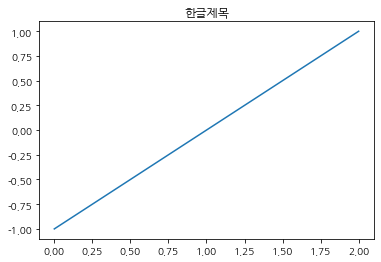

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글제목')
plt.plot([-1,0,1])
plt.show()

##① 서울시의 11년(2010년~2021년)간 특정 자치구의 학교 현황 변화 알아보기

In [ ]:
import csv
data1 = csv.reader(open('seoul10-21.csv'))

x2010 = [] #2010년 학교수, 학급수, 학생수, 학생수(남), 학생수(여), 교원수(명), 남 교원수(명), 여 교원수(명), 교실수(개)
x2011 = [] #2011년 학교수, 학급수, 학생수, 학생수(남), 학생수(여), 교원수(명), 남 교원수(명), 여 교원수(명), 교실수(개)
x2012 = []
x2013 = []
x2014 = []
x2015 = []
x2016 = []
x2017 = []
x2018 = []
x2019 = []
x2020 = []
x2021 = []

y = 2
z = 11

region = input('학교현황이 궁금한 자치구를 입력해주세요! (예: 종로구) : ')

for row in data1 : 
  if region in row[1] : 
    for i in range(y, z) : 
      x2010.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2011.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2012.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2013.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2014.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2015.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2016.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9) 
    for i in range(y, z) : 
      x2017.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9) 
    for i in range(y, z) : 
      x2018.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2019.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2020.append(int(row[i]))
    y = int(y + 9)
    z = int(z + 9)
    for i in range(y, z) : 
      x2021.append(int(row[i]))
    break

print()
print(region,'의 2010년 학교수는 ', x2010[0],'개,', '학급 당 학생 수는', x2010[2]/x2010[1],'명입니다.', '교사 1명당 학생 수는', x2010[2]/x2010[5],'명입니다.')
print(region,'의 2011년 학교수는 ', x2011[0],'개,', '학급 당 학생 수는', x2011[2]/x2011[1],'명입니다.', '교사 1명당 학생 수는', x2011[2]/x2011[5],'명입니다.')
print(region,'의 2012년 학교수는 ', x2012[0],'개,', '학급 당 학생 수는', x2012[2]/x2012[1],'명입니다.', '교사 1명당 학생 수는', x2012[2]/x2012[5],'명입니다.')
print(region,'의 2013년 학교수는 ', x2013[0],'개,', '학급 당 학생 수는', x2013[2]/x2013[1],'명입니다.', '교사 1명당 학생 수는', x2013[2]/x2013[5],'명입니다.')
print(region,'의 2014년 학교수는 ', x2014[0],'개,', '학급 당 학생 수는', x2014[2]/x2014[1],'명입니다.', '교사 1명당 학생 수는', x2014[2]/x2014[5],'명입니다.')
print(region,'의 2015년 학교수는 ', x2015[0],'개,', '학급 당 학생 수는', x2015[2]/x2015[1],'명입니다.', '교사 1명당 학생 수는', x2015[2]/x2015[5],'명입니다.')
print(region,'의 2016년 학교수는 ', x2016[0],'개,', '학급 당 학생 수는', x2016[2]/x2016[1],'명입니다.', '교사 1명당 학생 수는', x2016[2]/x2016[5],'명입니다.')
print(region,'의 2017년 학교수는 ', x2017[0],'개,', '학급 당 학생 수는', x2017[2]/x2017[1],'명입니다.', '교사 1명당 학생 수는', x2017[2]/x2017[5],'명입니다.')
print(region,'의 2018년 학교수는 ', x2018[0],'개,', '학급 당 학생 수는', x2018[2]/x2018[1],'명입니다.', '교사 1명당 학생 수는', x2018[2]/x2018[5],'명입니다.')
print(region,'의 2019년 학교수는 ', x2019[0],'개,', '학급 당 학생 수는', x2019[2]/x2019[1],'명입니다.', '교사 1명당 학생 수는', x2019[2]/x2019[5],'명입니다.')
print(region,'의 2020년 학교수는 ', x2020[0],'개,', '학급 당 학생 수는', x2020[2]/x2020[1],'명입니다.', '교사 1명당 학생 수는', x2020[2]/x2020[5],'명입니다.')
print(region,'의 2021년 학교수는 ', x2021[0],'개,', '학급 당 학생 수는', x2021[2]/x2021[1],'명입니다.', '교사 1명당 학생 수는', x2021[2]/x2021[5],'명입니다.')




학교현황이 궁금한 자치구를 입력해주세요! (예: 종로구) : 관악구

관악구 의 2010년 학교수는  22 개, 학급 당 학생 수는 28.31213191990577 명입니다. 교사 1명당 학생 수는 19.400322841000808 명입니다.
관악구 의 2011년 학교수는  22 개, 학급 당 학생 수는 27.538840937114674 명입니다. 교사 1명당 학생 수는 18.02582728006457 명입니다.
관악구 의 2012년 학교수는  22 개, 학급 당 학생 수는 25.97616060225847 명입니다. 교사 1명당 학생 수는 16.43095238095238 명입니다.
관악구 의 2013년 학교수는  22 개, 학급 당 학생 수는 24.75064599483204 명입니다. 교사 1명당 학생 수는 15.411906677393404 명입니다.
관악구 의 2014년 학교수는  22 개, 학급 당 학생 수는 24.099737532808398 명입니다. 교사 1명당 학생 수는 15.00326797385621 명입니다.
관악구 의 2015년 학교수는  22 개, 학급 당 학생 수는 23.853494623655912 명입니다. 교사 1명당 학생 수는 14.463732681336593 명입니다.
관악구 의 2016년 학교수는  22 개, 학급 당 학생 수는 22.970068027210885 명입니다. 교사 1명당 학생 수는 14.092654424040067 명입니다.
관악구 의 2017년 학교수는  22 개, 학급 당 학생 수는 22.412983425414364 명입니다. 교사 1명당 학생 수는 13.86923076923077 명입니다.
관악구 의 2018년 학교수는  22 개, 학급 당 학생 수는 22.053146853146853 명입니다. 교사 1명당 학생 수는 13.74716652136007 명입니다.
관악구 의 2019년 학교수는  22 개, 학급 당 학생 수는 21.443037974683545 명입니다. 교사 1명당 학생 수는 13.79728506787

##② 서울시 특정 자치구의 학교 현황 변화 그래프로 알아보기 (학교 수, 학급 수, 학생 수, 교원 수)

학교현황이 궁금한 자치구를 입력해주세요! (예: 종로구) : 관악구
그래프가 궁금한 항목을 다음 보기에서 골라 숫자로 쓰시오. 
 1: 학교 수(개), 2: 학급 수(개), 3: 학생 수(명), 4: 교원 수(명) 
4
[1239, 1239, 1260, 1243, 1224, 1227, 1198, 1170, 1147, 1105, 1067, 1044]


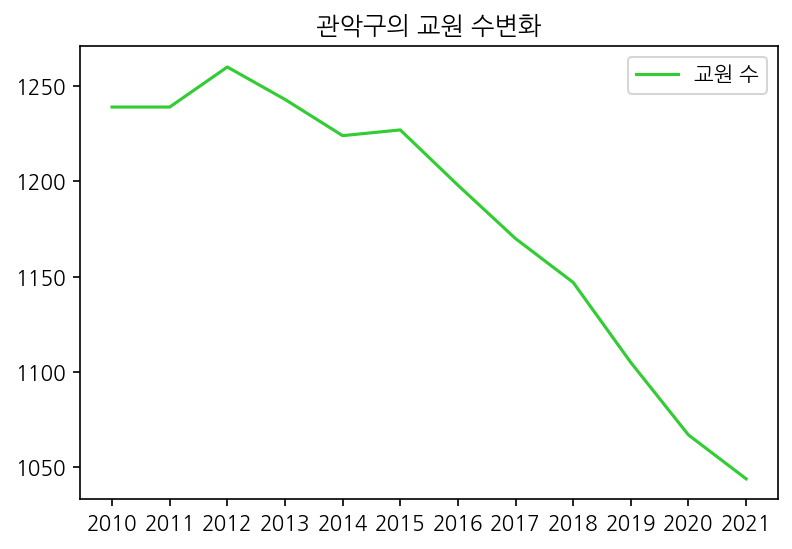

In [ ]:
region = input('학교현황이 궁금한 자치구를 입력해주세요! (예: 종로구) : ')
Q = input('그래프가 궁금한 항목을 다음 보기에서 골라 숫자로 쓰시오. \n 1: 학교 수(개), 2: 학급 수(개), 3: 학생 수(명), 4: 교원 수(명) \n' )

if Q == '1' :
  N = 0
  M = '학교 수'
if Q == '2' :
  N = 1
  M = '학급 수'
if Q == '3' :
  N = 2
  M = '학생 수'
if Q == '4' :
  N = 5
  M = '교원 수'

data2 = [x2010[N], x2011[N], x2012[N], x2013[N], x2014[N], x2015[N], x2016[N], x2017[N], x2018[N], x2019[N], x2020[N], x2021[N]]
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

print(data2)

import matplotlib.pyplot as plt
plt.figure(dpi = 150)
plt.title(region + '의 ' + M + '변화')
plt.plot(years, data2, c = 'limegreen', label = M)

plt.legend()
plt.show()

##③ 서울시 특정 자치구의 학교 현황 변화 그래프로 알아보기2 (학급 당 학생 수, 교사 1명 당 학생 수)

학교현황이 궁금한 자치구를 입력해주세요! (예: 종로구) : 관악구
그래프가 궁금한 항목을 다음 보기에서 골라 숫자로 쓰시오. 
 1: 학급 당 학생 수(명), 2: 교사 1명당 학생 수(명) 
1
[28, 27, 25, 24, 24, 23, 22, 22, 22, 21, 20, 20]


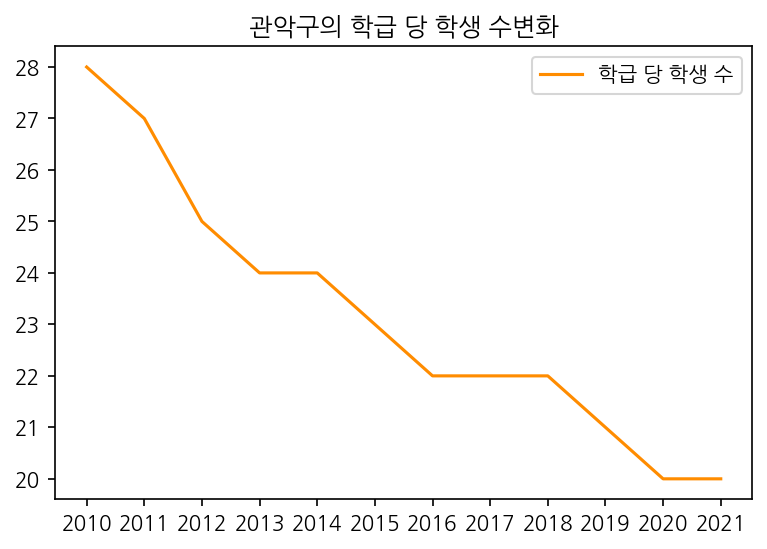

In [ ]:
region = input('학교현황이 궁금한 자치구를 입력해주세요! (예: 종로구) : ')
Q1 = input('그래프가 궁금한 항목을 다음 보기에서 골라 숫자로 쓰시오. \n 1: 학급 당 학생 수(명), 2: 교사 1명당 학생 수(명) \n' )

if Q == '1' :
  N1 = 2
  N2 = 1
  M = '학급 당 학생 수'
if Q == '2' :
  N1 = 2
  N2 = 5
  M = '교사 1명당 학생 수'


data3 = [int(x2010[N1]/x2010[N2]), int(x2011[N1]/x2011[N2]), int(x2012[N1]/x2012[N2]), int(x2013[N1]/x2013[N2]), int(x2014[N1]/x2014[N2]), int(x2015[N1]/x2015[N2]), int(x2016[N1]/x2016[N2]), int(x2017[N1]/x2017[N2]), int(x2018[N1]/x2018[N2]), int(x2019[N1]/x2019[N2]), int(x2020[N1]/x2020[N2]), int(x2021[N1]/x2021[N2])]
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

print(data3)

import matplotlib.pyplot as plt
plt.figure(dpi = 150)
plt.title(region + '의 ' + M + '변화')
plt.plot(years, data3, c = 'darkorange', label = M)

plt.legend()
plt.show()